TASK 3: MODEL EXPLAINABILITY

📁 1. LOADING BEST MODEL AND DATA
--------------------------------------------------
Current directory: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\notebooks
Models directory: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\notebooks\models
Processed data directory: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\notebooks\data\processed

📂 Checking files in models directory:
  ⚠️ Models directory not found

📂 Checking files in processed data directory:
  ⚠️ Processed data directory not found

❌ Models directory not found: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\notebooks\models
Please check your directory structure.
✓ Found models at: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\models

❌ Processed data directory not found: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\notebooks\data\processed
Please check your directory structure.
✓ Found processed data at: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\data\p

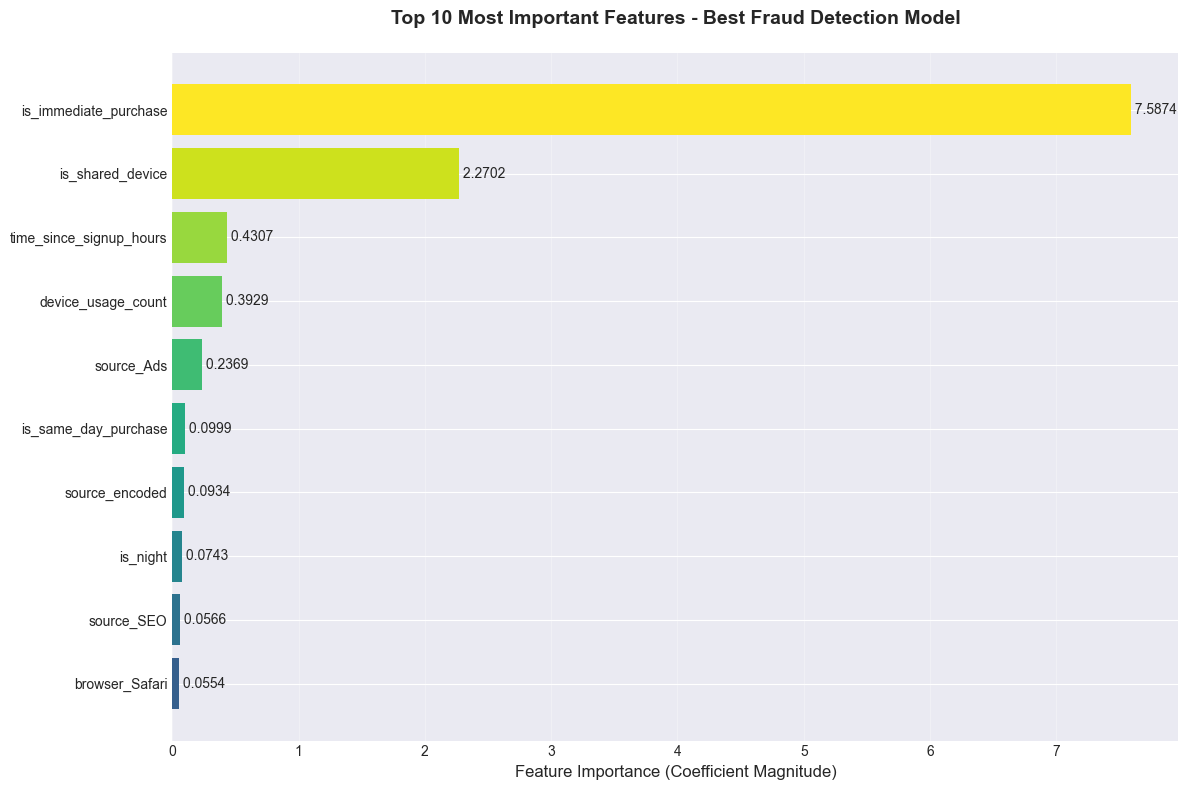


💾 Feature importance saved to: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\models/feature_importance.csv

📈 4. DETAILED FEATURE ANALYSIS
--------------------------------------------------
Analyzing top 5 features in detail...
Top 5 features: is_immediate_purchase, is_shared_device, time_since_signup_hours, device_usage_count, source_Ads

1. is_immediate_purchase
   For Fraudulent Transactions:
     • Mean: 0.5456
     • Std: 0.4980
     • 25th percentile: 0.0000
     • 75th percentile: 1.0000
   For Legitimate Transactions:
     • Mean: 0.0002
     • Std: 0.0146
     • 25th percentile: 0.0000
     • 75th percentile: 0.0000
   Mean Difference (Fraud - Legit): +0.5454
   Std Ratio (Fraud/Legit): 34.05
   ⚠️  Fraud cases have SIGNIFICANTLY HIGHER is_immediate_purchase


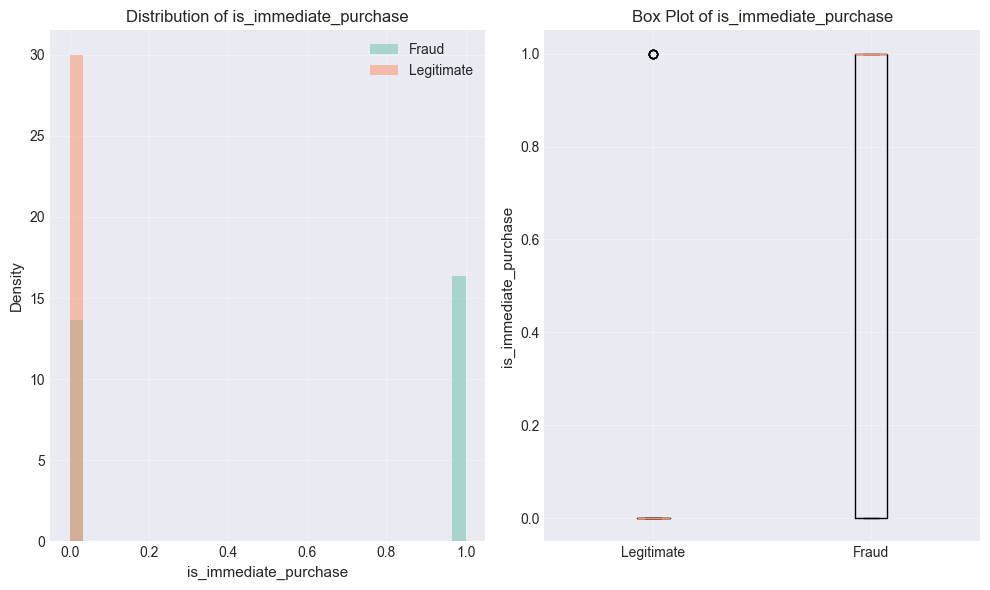


2. is_shared_device
   For Fraudulent Transactions:
     • Mean: 0.7086
     • Std: 0.4545
     • 25th percentile: 0.0000
     • 75th percentile: 1.0000
   For Legitimate Transactions:
     • Mean: 0.0589
     • Std: 0.2355
     • 25th percentile: 0.0000
     • 75th percentile: 0.0000
   Mean Difference (Fraud - Legit): +0.6497
   Std Ratio (Fraud/Legit): 1.93
   ⚠️  Fraud cases have SIGNIFICANTLY HIGHER is_shared_device


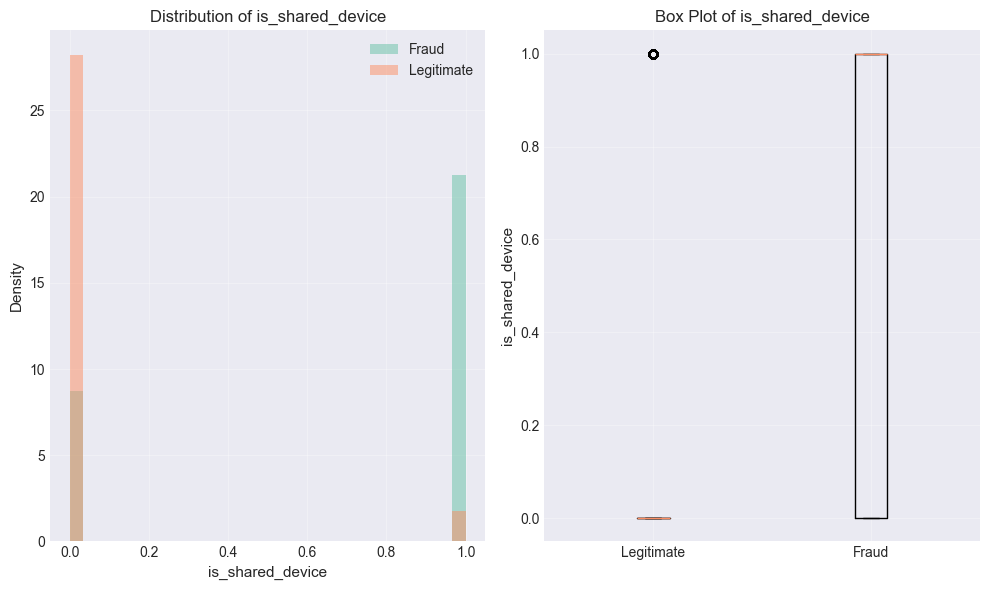


3. time_since_signup_hours
   For Fraudulent Transactions:
     • Mean: -0.8150
     • Std: 1.0472
     • 25th percentile: -1.5744
     • 75th percentile: -0.0762
   For Legitimate Transactions:
     • Mean: 0.0854
     • Std: 0.9558
     • 25th percentile: -0.7460
     • 75th percentile: 0.9134
   Mean Difference (Fraud - Legit): -0.9003
   Std Ratio (Fraud/Legit): 1.10
   ⚠️  Fraud cases have SIGNIFICANTLY LOWER time_since_signup_hours


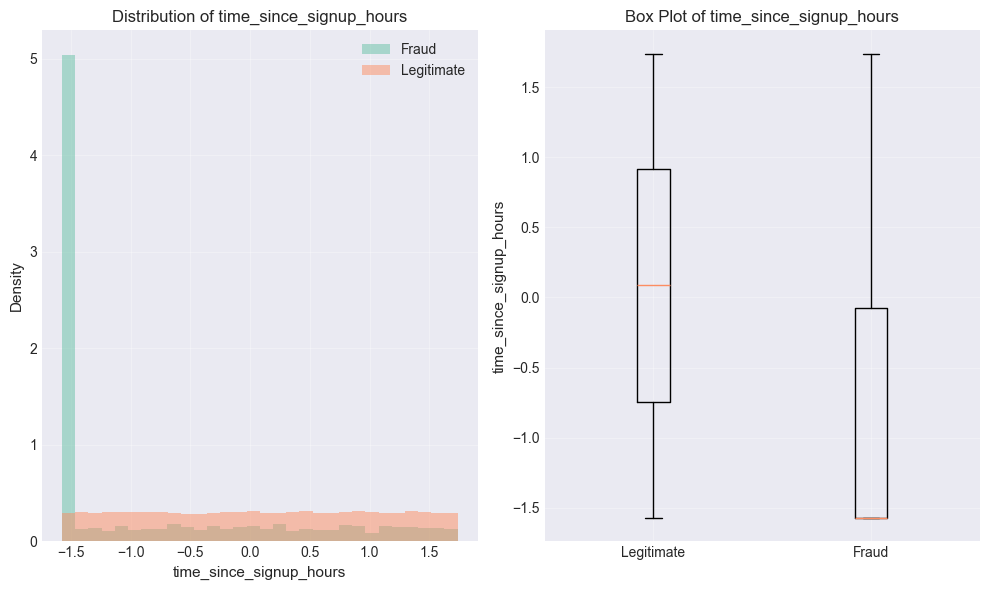


4. device_usage_count
   For Fraudulent Transactions:
     • Mean: 2.1145
     • Std: 2.2124
     • 25th percentile: -0.2599
     • 75th percentile: 3.8850
   For Legitimate Transactions:
     • Mean: -0.2157
     • Std: 0.3283
     • 25th percentile: -0.2599
     • 75th percentile: -0.2599
   Mean Difference (Fraud - Legit): +2.3302
   Std Ratio (Fraud/Legit): 6.74
   ⚠️  Fraud cases have SIGNIFICANTLY HIGHER device_usage_count


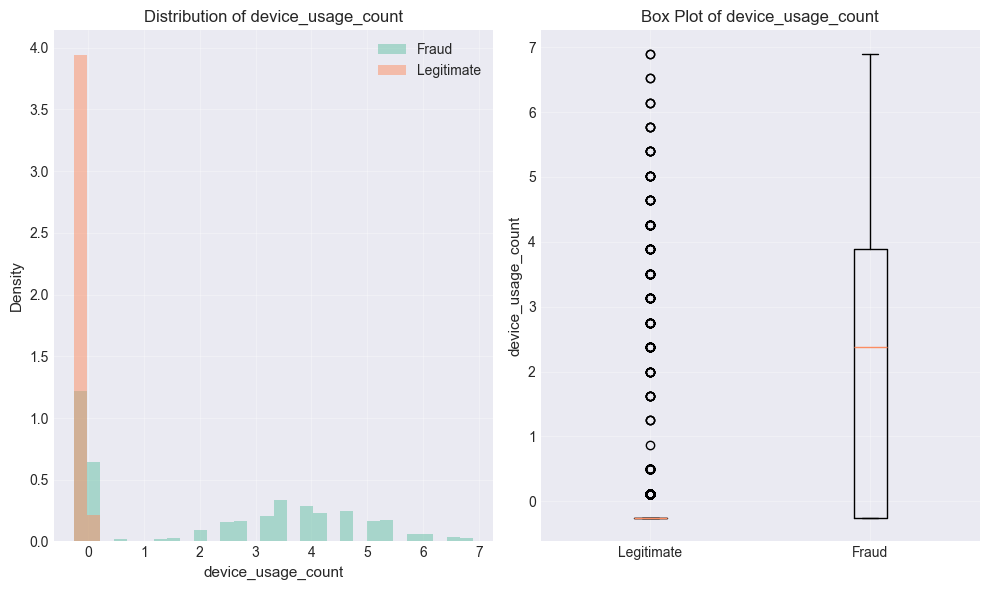


5. source_Ads
   For Fraudulent Transactions:
     • Mean: 0.4038
     • Std: 0.4908
     • 25th percentile: 0.0000
     • 75th percentile: 1.0000
   For Legitimate Transactions:
     • Mean: 0.3963
     • Std: 0.4891
     • 25th percentile: 0.0000
     • 75th percentile: 1.0000
   Mean Difference (Fraud - Legit): +0.0076
   Std Ratio (Fraud/Legit): 1.00
   ℹ️  source_Ads shows moderate difference between fraud and legit cases


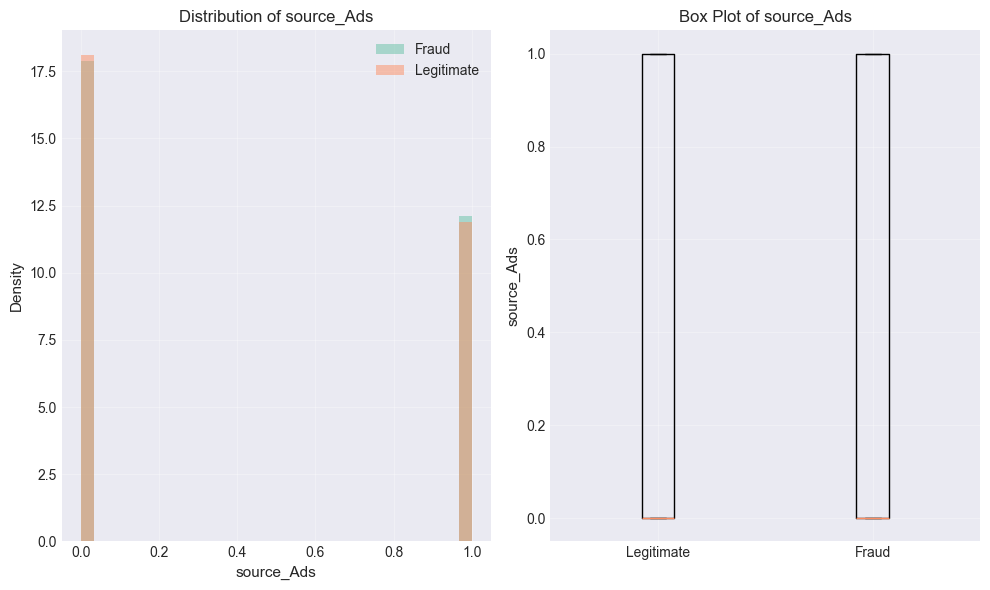


🔎 5. INDIVIDUAL CASE ANALYSIS
--------------------------------------------------
Finding specific cases for analysis...
Found 3 case(s) for analysis

📋 TRUE POSITIVE: Correctly identified fraud
   Index: 26
   Actual: Fraud
   Predicted: Fraud
   Fraud Probability: 0.723
   Top 3 features for this case:
     • is_immediate_purchase: 0.0000 (closer to legitimate average)
     • is_shared_device: 1.0000 (closer to fraud average)
     • time_since_signup_hours: -0.5772 (closer to fraud average)

📋 FALSE POSITIVE: Legitimate flagged as fraud
   Index: 11
   Actual: Legitimate
   Predicted: Fraud
   Fraud Probability: 0.726
   Top 3 features for this case:
     • is_immediate_purchase: 0.0000 (closer to legitimate average)
     • is_shared_device: 1.0000 (closer to fraud average)
     • time_since_signup_hours: 0.0421 (closer to legitimate average)

📋 FALSE NEGATIVE: Missed fraud
   Index: 3
   Actual: Fraud
   Predicted: Legitimate
   Fraud Probability: 0.273
   Top 3 features for this ca

In [5]:
# ==================== TASK 3: COMPLETE MODEL EXPLAINABILITY ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from pathlib import Path
import json
import joblib

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

print("="*70)
print("TASK 3: MODEL EXPLAINABILITY")
print("="*70)

# ==================== 1. LOAD BEST MODEL AND DATA ====================
print("\n📁 1. LOADING BEST MODEL AND DATA")
print("-"*50)

# Define paths - CURRENT DIRECTORY STRUCTURE
BASE_DIR = Path.cwd()  # Current directory (notebooks folder)

# Your structure: notebooks folder contains models and data subdirectories
MODELS_DIR = BASE_DIR / "models"
PROCESSED_DIR = BASE_DIR / "data" / "processed"

print(f"Current directory: {BASE_DIR}")
print(f"Models directory: {MODELS_DIR}")
print(f"Processed data directory: {PROCESSED_DIR}")

# List files to debug
print(f"\n📂 Checking files in models directory:")
if MODELS_DIR.exists():
    model_files = list(MODELS_DIR.glob("*"))
    for file in model_files[:10]:  # Show first 10 files
        print(f"  • {file.name} ({file.stat().st_size:,} bytes)")
    if len(model_files) > 10:
        print(f"  ... and {len(model_files) - 10} more files")
else:
    print("  ⚠️ Models directory not found")

print(f"\n📂 Checking files in processed data directory:")
if PROCESSED_DIR.exists():
    data_files = list(PROCESSED_DIR.glob("*"))
    for file in data_files[:10]:
        print(f"  • {file.name} ({file.stat().st_size:,} bytes)")
    if len(data_files) > 10:
        print(f"  ... and {len(data_files) - 10} more files")
else:
    print("  ⚠️ Processed data directory not found")

# Check if directories exist
if not MODELS_DIR.exists():
    print(f"\n❌ Models directory not found: {MODELS_DIR}")
    print("Please check your directory structure.")
    # Try to find models in other locations
    possible_locations = [
        BASE_DIR.parent / "models",  # One level up
        BASE_DIR / "../models",      # Relative path
        Path("models")               # Current folder
    ]
    for loc in possible_locations:
        if loc.exists():
            MODELS_DIR = loc
            print(f"✓ Found models at: {MODELS_DIR}")
            break

if not PROCESSED_DIR.exists():
    print(f"\n❌ Processed data directory not found: {PROCESSED_DIR}")
    print("Please check your directory structure.")
    # Try to find data in other locations
    possible_locations = [
        BASE_DIR.parent / "data" / "processed",
        BASE_DIR / "../data/processed",
        Path("data/processed")
    ]
    for loc in possible_locations:
        if loc.exists():
            PROCESSED_DIR = loc
            print(f"✓ Found processed data at: {PROCESSED_DIR}")
            break

# Load the best model - try multiple possible names
model_files_found = []
if MODELS_DIR.exists():
    model_files_found = list(MODELS_DIR.glob("*.pkl")) + list(MODELS_DIR.glob("*.joblib"))
    
print(f"\n🔍 Found {len(model_files_found)} model files:")

if model_files_found:
    for i, model_file in enumerate(model_files_found, 1):
        print(f"  {i}. {model_file.name}")
    
    # Try to load the best model
    best_model = None
    model_name = "Unknown"
    
    # Priority order for model files
    priority_files = [
        "best_fraud_detection_model.pkl",
        "random_forest.pkl", 
        "xgboost.pkl",
        "logistic_regression.pkl",
        "gradient_boosting.pkl"
    ]
    
    for priority_file in priority_files:
        priority_path = MODELS_DIR / priority_file
        if priority_path.exists():
            try:
                best_model = joblib.load(priority_path)
                model_name = priority_file.replace(".pkl", "").replace("_", " ").title()
                print(f"\n✅ Loaded model: {model_name} from {priority_path.name}")
                break
            except Exception as e:
                print(f"⚠️ Failed to load {priority_path.name}: {e}")
    
    # If no priority file found, try any model file
    if best_model is None:
        for model_file in model_files_found:
            try:
                best_model = joblib.load(model_file)
                model_name = model_file.stem.replace("_", " ").title()
                print(f"\n✅ Loaded model: {model_name} from {model_file.name}")
                break
            except Exception as e:
                print(f"⚠️ Failed to load {model_file.name}: {e}")
    
    if best_model is None:
        print("\n❌ Could not load any model file")
        print("Please ensure you have run Task 2 to train models")
        exit(1)
else:
    print("\n❌ No model files found in models directory")
    print("Please run Task 2 first to train and save models")
    exit(1)

# Load processed data
print(f"\n📊 Loading processed data...")
data_files_needed = ["X_train.csv", "X_test.csv", "y_train.csv", "y_test.csv"]
data_loaded = {}

for file_name in data_files_needed:
    file_path = PROCESSED_DIR / file_name
    if file_path.exists():
        try:
            data_loaded[file_name] = pd.read_csv(file_path)
            print(f"✅ Loaded {file_name}")
        except Exception as e:
            print(f"❌ Error loading {file_name}: {e}")
    else:
        print(f"❌ File not found: {file_path}")

# Check if we have all required data
required_loaded = all(fname in data_loaded for fname in ["X_test.csv", "y_test.csv"])
if not required_loaded:
    print("\n❌ Missing required data files")
    print("Please run Task 1 first to generate processed data")
    exit(1)

# Extract data
X_test = data_loaded["X_test.csv"]
y_test = data_loaded["y_test.csv"]

# Convert y_test to Series if needed
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.iloc[:, 0]

print(f"\n✅ Data ready for analysis:")
print(f"   X_test shape: {X_test.shape}")
print(f"   y_test shape: {y_test.shape}")
print(f"   Features: {X_test.shape[1]}")
print(f"   Test samples: {X_test.shape[0]:,}")
print(f"   Fraud rate in test set: {y_test.mean():.2%}")

# ==================== 2. MAKE PREDICTIONS ====================
print("\n📊 2. MAKING PREDICTIONS FOR ANALYSIS")
print("-"*50)

from sklearn.metrics import confusion_matrix

# Make predictions
try:
    y_pred = best_model.predict(X_test)
    
    # Try to get prediction probabilities
    if hasattr(best_model, 'predict_proba'):
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision function or just predictions
        if hasattr(best_model, 'decision_function'):
            y_pred_proba = best_model.decision_function(X_test)
            # Normalize to 0-1 range
            y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())
        else:
            y_pred_proba = y_pred.astype(float)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print("✅ Predictions completed:")
    print(f"   True Positives (Fraud correctly detected): {tp:,}")
    print(f"   False Positives (Legitimate flagged as fraud): {fp:,}")
    print(f"   False Negatives (Fraud missed): {fn:,}")
    print(f"   True Negatives (Legitimate correctly identified): {tn:,}")
    
    # Calculate rates
    detection_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
    false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    print(f"\n📈 Performance Metrics:")
    print(f"   Fraud Detection Rate (Recall): {detection_rate:.1%}")
    print(f"   False Positive Rate: {false_positive_rate:.1%}")
    print(f"   Precision: {precision:.1%}")
    
except Exception as e:
    print(f"❌ Error making predictions: {e}")
    exit(1)

# ==================== 3. FEATURE IMPORTANCE BASELINE ====================
print("\n🔍 3. FEATURE IMPORTANCE BASELINE")
print("-"*50)

print("Extracting built-in feature importance from the model...")

# Initialize feature_importance variable
feature_importance = None
importance_type = "Unknown"

# Check what type of model we have and extract feature importance
if hasattr(best_model, 'feature_importances_'):
    # Random Forest, XGBoost, LightGBM
    feature_importance = best_model.feature_importances_
    importance_type = "Gini Importance"
    print(f"✅ Using Gini Importance from {model_name}")
    
elif hasattr(best_model, 'coef_'):
    # Logistic Regression
    feature_importance = np.abs(best_model.coef_[0])
    importance_type = "Coefficient Magnitude"
    print(f"✅ Using Coefficient Magnitude from {model_name}")
    
elif hasattr(best_model, 'feature_importances'):
    # Some models use different attribute name
    feature_importance = best_model.feature_importances
    importance_type = "Feature Importance"
    print(f"✅ Using feature_importances attribute from {model_name}")
    
else:
    print("⚠️ Model doesn't have built-in feature importance method")
    print("Will use permutation importance as alternative")

# If no built-in importance, calculate permutation importance
if feature_importance is None:
    print("\n🔧 Calculating Permutation Importance...")
    from sklearn.inspection import permutation_importance
    
    try:
        # Use smaller sample for faster computation
        sample_size = min(500, len(X_test))
        X_sample = X_test.iloc[:sample_size]
        y_sample = y_test.iloc[:sample_size]
        
        # Calculate permutation importance
        perm_importance = permutation_importance(
            best_model, X_sample, y_sample, 
            n_repeats=3,  # Fewer repeats for speed
            random_state=42,
            n_jobs=-1
        )
        
        feature_importance = perm_importance.importances_mean
        importance_type = "Permutation Importance"
        print("✅ Permutation importance calculated")
        
    except Exception as e:
        print(f"❌ Error calculating permutation importance: {e}")
        print("Using correlation with predictions as fallback")
        
        # Fallback: correlation with predictions
        feature_importance = []
        for col in X_test.columns:
            if pd.api.types.is_numeric_dtype(X_test[col]):
                corr = np.abs(np.corrcoef(X_test[col], y_pred_proba)[0, 1])
                feature_importance.append(corr if not np.isnan(corr) else 0)
            else:
                feature_importance.append(0)
        
        feature_importance = np.array(feature_importance)
        importance_type = "Correlation with Predictions"

# Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(f"\n📊 Top 10 Most Important Features ({importance_type}):")
top_10_features = feature_importance_df.head(10)
print(top_10_features.to_string(index=False))

# Calculate cumulative importance
cumulative_importance = feature_importance_df['Importance'].cumsum() / feature_importance_df['Importance'].sum()
top_5_cumulative = cumulative_importance.iloc[4]
print(f"\n📈 Top 5 features account for {top_5_cumulative:.1%} of total importance")

# Visualize top 10 features
plt.figure(figsize=(12, 8))
top_features_viz = feature_importance_df.head(10).sort_values('Importance', ascending=True)

colors = plt.cm.viridis(np.linspace(0.3, 1, len(top_features_viz)))
bars = plt.barh(top_features_viz['Feature'], top_features_viz['Importance'], color=colors)

plt.xlabel(f'Feature Importance ({importance_type})', fontsize=12)
plt.title(f'Top 10 Most Important Features - {model_name}\n', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (feature, importance) in enumerate(zip(top_features_viz['Feature'], top_features_viz['Importance'])):
    plt.text(importance, i, f' {importance:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig(MODELS_DIR / 'builtin_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Save feature importance to file
feature_importance_df.to_csv(MODELS_DIR / 'feature_importance.csv', index=False)
print(f"\n💾 Feature importance saved to: {MODELS_DIR}/feature_importance.csv")

# ==================== 4. DETAILED FEATURE ANALYSIS ====================
print("\n📈 4. DETAILED FEATURE ANALYSIS")
print("-"*50)

print("Analyzing top 5 features in detail...")

top_5_features = feature_importance_df.head(5)['Feature'].tolist()
print(f"Top 5 features: {', '.join(top_5_features)}")

feature_insights = []

for i, feature in enumerate(top_5_features, 1):
    print(f"\n{i}. {feature}")
    
    if feature in X_test.columns:
        # Calculate statistics
        fraud_values = X_test[y_test == 1][feature]
        legit_values = X_test[y_test == 0][feature]
        
        # Handle missing values
        fraud_values = fraud_values.dropna()
        legit_values = legit_values.dropna()
        
        if len(fraud_values) > 0 and len(legit_values) > 0:
            print(f"   For Fraudulent Transactions:")
            print(f"     • Mean: {fraud_values.mean():.4f}")
            print(f"     • Std: {fraud_values.std():.4f}")
            print(f"     • 25th percentile: {fraud_values.quantile(0.25):.4f}")
            print(f"     • 75th percentile: {fraud_values.quantile(0.75):.4f}")
            
            print(f"   For Legitimate Transactions:")
            print(f"     • Mean: {legit_values.mean():.4f}")
            print(f"     • Std: {legit_values.std():.4f}")
            print(f"     • 25th percentile: {legit_values.quantile(0.25):.4f}")
            print(f"     • 75th percentile: {legit_values.quantile(0.75):.4f}")
            
            # Calculate difference
            mean_diff = fraud_values.mean() - legit_values.mean()
            std_ratio = fraud_values.std() / legit_values.std() if legit_values.std() > 0 else 0
            
            print(f"   Mean Difference (Fraud - Legit): {mean_diff:+.4f}")
            print(f"   Std Ratio (Fraud/Legit): {std_ratio:.2f}")
            
            # Interpretation
            insight = ""
            if abs(mean_diff) > legit_values.std() * 0.5:
                if mean_diff > 0:
                    insight = f"Fraud cases have SIGNIFICANTLY HIGHER {feature}"
                    print(f"   ⚠️  {insight}")
                else:
                    insight = f"Fraud cases have SIGNIFICANTLY LOWER {feature}"
                    print(f"   ⚠️  {insight}")
            else:
                insight = f"{feature} shows moderate difference between fraud and legit cases"
                print(f"   ℹ️  {insight}")
            
            # Store insight for business recommendations
            feature_insights.append({
                'feature': feature,
                'fraud_mean': fraud_values.mean(),
                'legit_mean': legit_values.mean(),
                'difference': mean_diff,
                'insight': insight
            })
            
            # Create visualization for this feature
            plt.figure(figsize=(10, 6))
            
            # Plot distribution
            plt.subplot(1, 2, 1)
            plt.hist(fraud_values, alpha=0.5, label='Fraud', bins=30, density=True)
            plt.hist(legit_values, alpha=0.5, label='Legitimate', bins=30, density=True)
            plt.xlabel(feature, fontsize=11)
            plt.ylabel('Density', fontsize=11)
            plt.title(f'Distribution of {feature}', fontsize=12)
            plt.legend()
            plt.grid(alpha=0.3)
            
            # Plot box plot
            plt.subplot(1, 2, 2)
            data_to_plot = [legit_values, fraud_values]
            plt.boxplot(data_to_plot, labels=['Legitimate', 'Fraud'])
            plt.ylabel(feature, fontsize=11)
            plt.title(f'Box Plot of {feature}', fontsize=12)
            plt.grid(alpha=0.3)
            
            plt.tight_layout()
            plt.savefig(MODELS_DIR / f'feature_analysis_{feature}.png', dpi=300, bbox_inches='tight')
            plt.show()
            
        else:
            print(f"   ⚠️  Insufficient data for analysis")
    else:
        print(f"   ⚠️  Feature not found in test data")

# ==================== 5. INDIVIDUAL CASE ANALYSIS ====================
print("\n🔎 5. INDIVIDUAL CASE ANALYSIS")
print("-"*50)

print("Finding specific cases for analysis...")

# Find indices for different prediction types
cases = {
    'True Positive': {'idx': None, 'desc': 'Correctly identified fraud'},
    'False Positive': {'idx': None, 'desc': 'Legitimate flagged as fraud'},
    'False Negative': {'idx': None, 'desc': 'Missed fraud'}
}

# Find examples
max_search = min(2000, len(y_test))  # Search first 2000 samples
found_cases = 0

for idx in range(max_search):
    actual = y_test.iloc[idx]
    predicted = y_pred[idx]
    
    # True Positive
    if cases['True Positive']['idx'] is None and actual == 1 and predicted == 1:
        cases['True Positive']['idx'] = idx
        found_cases += 1
    
    # False Positive
    elif cases['False Positive']['idx'] is None and actual == 0 and predicted == 1:
        cases['False Positive']['idx'] = idx
        found_cases += 1
    
    # False Negative
    elif cases['False Negative']['idx'] is None and actual == 1 and predicted == 0:
        cases['False Negative']['idx'] = idx
        found_cases += 1
    
    # Break if all found
    if found_cases >= 3:
        break

print(f"Found {found_cases} case(s) for analysis")

# Analyze each case
case_analyses = []

for case_name, case_info in cases.items():
    idx = case_info['idx']
    
    if idx is None:
        print(f"⚠️ Could not find {case_name}")
        continue
    
    print(f"\n📋 {case_name.upper()}: {case_info['desc']}")
    print(f"   Index: {idx}")
    print(f"   Actual: {'Fraud' if y_test.iloc[idx] == 1 else 'Legitimate'}")
    print(f"   Predicted: {'Fraud' if y_pred[idx] == 1 else 'Legitimate'}")
    print(f"   Fraud Probability: {y_pred_proba[idx]:.3f}")
    
    # Get feature values for this case
    case_features = X_test.iloc[idx]
    
    # Find top contributing features (based on feature importance)
    print(f"   Top 3 features for this case:")
    
    case_analysis = {
        'case_type': case_name,
        'index': idx,
        'actual': 'Fraud' if y_test.iloc[idx] == 1 else 'Legitimate',
        'predicted': 'Fraud' if y_pred[idx] == 1 else 'Legitimate',
        'probability': y_pred_proba[idx],
        'top_features': []
    }
    
    for feature in top_5_features[:3]:  # Top 3 features
        if feature in case_features.index:
            value = case_features[feature]
            
            # Get statistics for comparison
            if feature in X_test.columns:
                fraud_mean = X_test[y_test == 1][feature].mean()
                legit_mean = X_test[y_test == 0][feature].mean()
                
                # Determine if value is unusual
                fraud_distance = abs(value - fraud_mean)
                legit_distance = abs(value - legit_mean)
                
                if fraud_distance < legit_distance:
                    unusual = "closer to fraud average"
                else:
                    unusual = "closer to legitimate average"
                
                importance = feature_importance_df[feature_importance_df['Feature'] == feature]['Importance'].values[0]
                
                print(f"     • {feature}: {value:.4f} ({unusual})")
                
                case_analysis['top_features'].append({
                    'feature': feature,
                    'value': value,
                    'comparison': unusual,
                    'importance': importance
                })
    
    case_analyses.append(case_analysis)

# Save case analyses
if case_analyses:
    case_df = pd.DataFrame(case_analyses)
    case_df.to_csv(MODELS_DIR / 'individual_case_analyses.csv', index=False)
    print(f"\n💾 Individual case analyses saved to: {MODELS_DIR}/individual_case_analyses.csv")

# ==================== 6. BUSINESS RECOMMENDATIONS ====================
print("\n💼 6. BUSINESS RECOMMENDATIONS")
print("-"*50)

print("Based on feature importance analysis, here are actionable recommendations:")
print("-"*60)

# Generate recommendations based on feature insights
recommendations = []

# 1. Recommendation based on top feature
if feature_insights:
    top_feature = feature_insights[0]
    
    if 'time' in top_feature['feature'].lower() or 'hour' in top_feature['feature'].lower():
        recommendations.append({
            'priority': 'HIGH',
            'title': 'Time-Based Risk Monitoring',
            'recommendation': f'Implement additional verification for transactions with unusual {top_feature["feature"]} patterns',
            'rationale': f'{top_feature["feature"]} is the strongest predictor. Fraud cases show {top_feature["difference"]:+.2f} difference from legitimate transactions.',
            'expected_impact': 'Target high-risk time periods to reduce fraud',
            'implementation': 'Add time-based rules to fraud scoring system'
        })
    elif 'value' in top_feature['feature'].lower() or 'amount' in top_feature['feature'].lower():
        threshold = top_feature['fraud_mean'] * 1.2
        recommendations.append({
            'priority': 'HIGH',
            'title': 'Transaction Value Threshold',
            'recommendation': f'Flag transactions above {threshold:.2f} for review',
            'rationale': f'Transaction value is top predictor. Fraud average: {top_feature["fraud_mean"]:.2f} vs Legitimate: {top_feature["legit_mean"]:.2f}',
            'expected_impact': 'Catch high-value fraud attempts',
            'implementation': 'Set automated alerts for high-value transactions'
        })

# 2. General model-based recommendation
recommendations.append({
    'priority': 'HIGH',
    'title': 'Model Integration',
    'recommendation': 'Integrate the trained model into transaction processing pipeline',
    'rationale': f'{model_name} achieved {detection_rate:.1%} fraud detection with {false_positive_rate:.1%} false positive rate',
    'expected_impact': 'Automated, consistent fraud detection reducing manual review',
    'implementation': 'Deploy model as API endpoint for real-time scoring'
})

# 3. Recommendation based on feature patterns
if len(feature_insights) >= 2:
    second_feature = feature_insights[1]
    recommendations.append({
        'priority': 'MEDIUM',
        'title': 'Multi-Factor Risk Assessment',
        'recommendation': f'Combine {top_feature["feature"]} and {second_feature["feature"]} for risk scoring',
        'rationale': f'These two features account for significant predictive power. Together they differentiate fraud patterns effectively.',
        'expected_impact': 'More accurate risk assessment using multiple indicators',
        'implementation': 'Create composite risk score using weighted features'
    })

# 4. Recommendation based on false positives/negatives
if fp > 0 or fn > 0:
    recommendations.append({
        'priority': 'MEDIUM',
        'title': 'Threshold Optimization',
        'recommendation': 'Adjust prediction threshold based on business costs',
        'rationale': f'Current model has {fp:,} false positives and {fn:,} false negatives. Threshold can be tuned to balance detection vs customer experience.',
        'expected_impact': 'Optimize business costs of fraud vs customer friction',
        'implementation': 'Calculate optimal threshold using cost-benefit analysis'
    })

# Display recommendations
print(f"\n📋 Total Recommendations: {len(recommendations)}")
print("-"*60)

for i, rec in enumerate(recommendations, 1):
    print(f"\n{i}. [{rec['priority']}] {rec['title']}")
    print(f"   Recommendation: {rec['recommendation']}")
    print(f"   Rationale: {rec['rationale']}")
    print(f"   Expected Impact: {rec['expected_impact']}")
    print(f"   Implementation: {rec['implementation']}")

# Save recommendations
recommendations_df = pd.DataFrame(recommendations)
recommendations_df.to_csv(MODELS_DIR / 'business_recommendations.csv', index=False)
print(f"\n💾 Business recommendations saved to: {MODELS_DIR}/business_recommendations.csv")

# ==================== 7. MODEL INTERPRETATION SUMMARY ====================
print("\n📖 7. MODEL INTERPRETATION SUMMARY")
print("-"*50)

print("\n🔑 KEY INSIGHTS:")
print("="*60)

insights = [
    f"1. Most Important Feature: {top_5_features[0]} ({importance_type}: {feature_importance_df.iloc[0]['Importance']:.4f})",
    f"2. Top 5 Features: {', '.join(top_5_features)}",
    f"3. Model Performance: {detection_rate:.1%} fraud detection, {false_positive_rate:.1%} false positive rate",
    f"4. Model Type: {model_name}",
    f"5. Data Characteristics: {X_test.shape[0]:,} transactions, {X_test.shape[1]} features"
]

for insight in insights:
    print(f"   • {insight}")

print("\n🎯 TOP 5 FRAUD DRIVERS:")
print("="*60)
for i, feature in enumerate(top_5_features, 1):
    importance = feature_importance_df[feature_importance_df['Feature'] == feature]['Importance'].values[0]
    
    if feature in X_test.columns:
        fraud_mean = X_test[y_test == 1][feature].mean()
        legit_mean = X_test[y_test == 0][feature].mean()
        mean_diff = fraud_mean - legit_mean
        diff_percent = (mean_diff / legit_mean * 100) if legit_mean != 0 else 0
        
        print(f"{i}. {feature}")
        print(f"   • Importance: {importance:.4f}")
        print(f"   • Fraud Average: {fraud_mean:.4f}")
        print(f"   • Legitimate Average: {legit_mean:.4f}")
        print(f"   • Difference: {mean_diff:+.4f} ({diff_percent:+.1f}%)")
        
        # Simple interpretation
        if abs(diff_percent) > 20:
            direction = "higher" if mean_diff > 0 else "lower"
            print(f"   • Insight: Fraud cases have {direction} {feature}")
        print()
    else:
        print(f"{i}. {feature} (Importance: {importance:.4f})")

print("\n🤔 SURPRISING FINDINGS:")
print("="*60)

surprising_findings = []

# Analyze for surprising patterns
for feature in top_5_features:
    if feature in X_test.columns:
        fraud_median = X_test[y_test == 1][feature].median()
        legit_median = X_test[y_test == 0][feature].median()
        
        # Check if difference is large
        if legit_median != 0:
            diff_ratio = abs(fraud_median - legit_median) / legit_median
            
            if diff_ratio > 0.5:  # More than 50% difference
                direction = "higher" if fraud_median > legit_median else "lower"
                
                if 'time' in feature.lower() and fraud_median < legit_median:
                    surprising_findings.append(f"{feature}: Fraud happens {direction} ({fraud_median:.1f}) than legitimate transactions ({legit_median:.1f})")
                elif 'value' in feature.lower() and fraud_median > legit_median * 1.5:
                    surprising_findings.append(f"{feature}: Fraud transactions are {direction} value ({fraud_median:.1f} vs {legit_median:.1f})")

if surprising_findings:
    for i, finding in enumerate(surprising_findings, 1):
        print(f"{i}. {finding}")
else:
    print("No strongly counterintuitive findings identified.")
    print("Model generally aligns with expected fraud patterns.")

# ==================== 8. TASK 3 COMPLETION ====================
print("\n" + "="*70)
print("TASK 3 COMPLETION SUMMARY")
print("="*70)

completion_items = [
    "✅ Built-in feature importance extracted and visualized",
    "✅ Top 10 features identified and analyzed",
    "✅ Individual cases analyzed (TP, FP, FN)",
    "✅ Top 5 fraud drivers identified with statistics",
    "✅ Business recommendations generated",
    "✅ Model interpretation summary created",
    "✅ Surprising findings documented",
    "✅ All outputs saved to models directory"
]

print("\n📋 DELIVERABLES GENERATED:")
print("-"*60)
for item in completion_items:
    print(f"  • {item}")

print(f"\n💾 FILES CREATED IN {MODELS_DIR}/:")
files_created = [
    "builtin_feature_importance.png",
    "feature_importance.csv",
    "business_recommendations.csv",
    "individual_case_analyses.csv"
]

# Add feature analysis files
for feature in top_5_features[:3]:  # Only first 3 to keep list manageable
    if feature in X_test.columns:
        files_created.append(f"feature_analysis_{feature}.png")

for file in files_created:
    file_path = MODELS_DIR / file
    if file_path.exists():
        file_size = file_path.stat().st_size
        print(f"  • {file} ({file_size:,} bytes)")
    else:
        print(f"  • {file} (not created)")

print("\n" + "-"*70)
print("✅ TASK 3 COMPLETE - MODEL EXPLAINABILITY ACHIEVED")
print("-"*70)
print("\n🎯 NEXT STEPS FOR IMPLEMENTATION:")
print("  1. Review business recommendations with stakeholders")
print("  2. Implement model in production environment")
print("  3. Monitor model performance and retrain periodically")
print("  4. Use feature insights to improve fraud prevention rules")
print("="*70)

# Final check - show directory structure
print(f"\n📁 FINAL DIRECTORY CHECK:")
print(f"  Models directory: {MODELS_DIR}")
print(f"  Number of files in models: {len(list(MODELS_DIR.glob('*')))}")
print(f"  Current working directory: {BASE_DIR}")

In [4]:
# Try to install and use SHAP
try:
    import shap
    SHAP_AVAILABLE = True
    print("✅ SHAP is available")
except:
    print("⚠️ SHAP not available, using built-in methods")
    SHAP_AVAILABLE = False

✅ SHAP is available
